# 붓꽃 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 붓꽃 데이터 불러오기
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

X = df.iloc[0:100, [0, 2]].values         # 앞 100개 샘플의 컬럼0(꽃받침 길이)과 컬럼2(꽃잎 길이) 값을 가지고 옴

y = df.iloc[0:100, 4].values              # 앞 100개 샘플의 정답값(꽃종류) 을 가지고 옴
y = np.where(y == 'Iris-setosa', 0, 1)   # 값이 Iris-setosa이면 0, 아니면 1로 표기함

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# 결정 경계 도시 함수

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# 로지스틱 회귀 모델

In [8]:
#scikit learn 패키지를 이용하여 logistic regression 코드 작성 학습후 아래 코드를 실행하면 그림과 같이 나와야함
import sklearn
from sklearn.linear_model import LogisticRegression 
logistic = LogisticRegression()
logistic.fit(X_std,y)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score
y_predict = logistic.predict(X_std)
accuracy = accuracy_score(y, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


C:\Users\infosec\AppData\Local\Temp\ipykernel_17628\3558053461.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


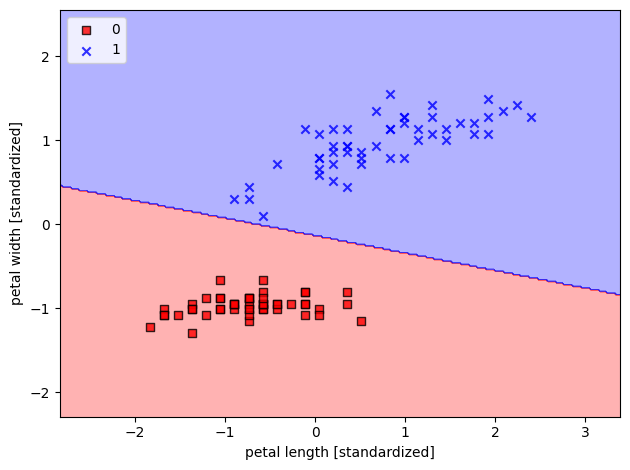

In [7]:
#classifier에 위에서 자신이 작성한 모델 이름을 넣으면 작동
plot_decision_regions(X_std, y, classifier=logistic)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()